# Assignment 10

Brandon Sams

07Nov2020

## Assignment 10.1

In the first part of the assignment, you will implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.

### Assignment 10.1.a

Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.

```python
def tokenize(sentence):
    tokens = []
    # tokenize the sentence
    return tokens
```

In [1]:
import keras

In [2]:
def tokenize(sentence):
    tokens = keras.preprocessing.text.text_to_word_sequence(sentence)
    return(tokens)

In [3]:
tokens = tokenize("The quick brown fox jumped over the lazy dog.")
tokens

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

### Assignment 10.1.b

Implement an `ngram` function that splits tokens into N-grams. 

```python
def ngram(tokens, n):
    ngrams = []
    # Create ngrams
    return ngrams
```

In [4]:
def ngram(tokens, n):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngram = ' '.join(word_list for word_list in tokens[i:i+n])
        ngrams.append(ngram)
    return(ngrams)

In [5]:
ngram = ngram(tokens,4)
ngram

['the quick brown fox',
 'quick brown fox jumped',
 'brown fox jumped over',
 'fox jumped over the',
 'jumped over the lazy',
 'over the lazy dog']

### Assignment 10.1.c

Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.

```python
def one_hot_encode(tokens, num_words):
    token_index = {}
    results = ''
    return results
```

In [6]:
def one_hot_encode(tokens, num_words = len(set(tokens))):
    num_words += 1 # Add an extra column, as this method always produces an empty first column
    tokenizer = keras.preprocessing.text.Tokenizer(num_words = num_words)
    tokenizer.fit_on_texts(tokens)
    sequences = tokenizer.texts_to_sequences(tokens)
    results = tokenizer.texts_to_matrix(tokens, mode='binary')
    results = results[:, 1:] # Remove first column, as it is always zeros
    token_index = tokenizer.word_index
    return(results)

In [7]:
one_hot_encode(tokens,10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [8]:
one_hot_encode(tokens)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

## Assignment 10.2

Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [9]:
import os
import numpy as np

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [10]:
max_words = 10000
embedding_dim = 100
maxlen = 100
training_samples = 200
validation_samples = 10000

In [11]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

data = keras.preprocessing.sequence.pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels)

In [12]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

In [13]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 143ms/step - loss: 0.6970 - acc: 0.4850 - val_loss: 0.6952 - val_acc: 0.4971
Epoch 2/10
7/7 [==============================] - 1s 101ms/step - loss: 0.5205 - acc: 0.9800 - val_loss: 0.7106 - 

In [15]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [16]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [17]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7702 - acc: 0.5220


[0.7701628804206848, 0.5219600200653076]

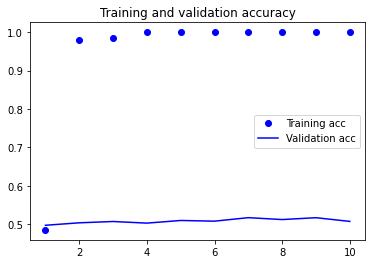

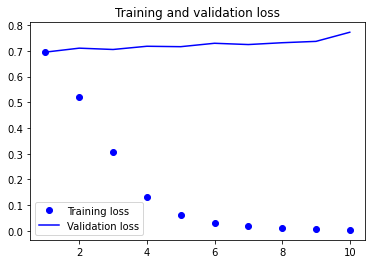

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()